In [1]:
import os
import numpy as np
from scipy.optimize import fsolve
from tqdm import tqdm
import matplotlib.pyplot as plt

# Function to solve the equation
def equation(n_star, T, delta1, delta2):
    term1 = 1 / ((np.sqrt(T / n_star) + np.sqrt(T * delta1**2 / (2 * np.log(T))))**2)
    term2 = 1 / ((np.sqrt(T / n_star) + np.sqrt(T * delta2**2 / (2 * np.log(T))))**2)
    return term1 + term2 - 1

def solve_n_star(T, theta, mu1):
    delta1 = 0
    delta2 = np.sqrt((theta * np.log(T)) / T)
    n_star_initial_guess = T / 2
    n_star_solution = fsolve(equation, n_star_initial_guess, args=(T, delta1, delta2))
    return n_star_solution[0]

class MultiArmedBandit:
    def __init__(self, mu1, T, theta):
        self.mu1 = mu1
        self.T = T
        self.theta = theta
        self.mu2 = mu1 - np.sqrt((theta * np.log(T)) / T)
        self.reset()

    def reset(self):
        self.arm1_rewards = []
        self.arm2_rewards = []
        self.arm1_pulls = 0
        self.arm2_pulls = 0

    def pull_arm(self, arm):
        if arm == 1:
            reward = np.random.normal(self.mu1, 1)
            self.arm1_rewards.append(reward)
            self.arm1_pulls += 1
            return reward
        elif arm == 2:
            reward = np.random.normal(self.mu2, 1)
            self.arm2_rewards.append(reward)
            self.arm2_pulls += 1
            return reward
        else:
            raise ValueError("Invalid arm. Choose 1 or 2.")

    def simulate(self):
        for t in range(1, self.T + 1):
            if self.arm1_pulls == 0:
                arm = 1
            elif self.arm2_pulls == 0:
                arm = 2
            else:
                mean1 = np.mean(self.arm1_rewards)
                mean2 = np.mean(self.arm2_rewards)
                ucb1 = mean1 + np.sqrt((2 * np.log(self.T)) / self.arm1_pulls)
                ucb2 = mean2 + np.sqrt((2 * np.log(self.T)) / self.arm2_pulls)
                arm = 1 if ucb1 >= ucb2 else 2
            self.pull_arm(arm)

    def get_results(self):
        mean1 = np.mean(self.arm1_rewards) if self.arm1_rewards else 0
        mean2 = np.mean(self.arm2_rewards) if self.arm2_rewards else 0
        return {
            'arm1_pulls': self.arm1_pulls,
            'arm2_pulls': self.arm2_pulls,
            'arm1_mean': mean1,
            'arm2_mean': mean2
        }

def run_experiments(T, num_experiments, mu1, theta):
    n_star = solve_n_star(T, theta, mu1)
    n_1_star = n_star
    n_2_star = T - n_star
    print("Solution for n_star:", n_star)

    all_results = []
    arm1_pulls = []
    arm2_pulls = []

    for _ in tqdm(range(num_experiments)):
        bandit = MultiArmedBandit(mu1, T, theta)
        bandit.simulate()
        results = bandit.get_results()
        all_results.append(results)
        arm1_pulls.append(results['arm1_pulls'])
        arm2_pulls.append(results['arm2_pulls'])

    avg_arm1_pulls = np.mean(arm1_pulls)
    avg_arm2_pulls = np.mean(arm2_pulls)

    print("Average Results after", num_experiments, "experiments:")
    print("Average Arm 1 pulls:", avg_arm1_pulls)
    print("Average Arm 2 pulls:", avg_arm2_pulls)

    return arm1_pulls, arm2_pulls, n_1_star, n_2_star

def plot_results(arm1_pulls, arm2_pulls, n_1_star, n_2_star, filename, folder='paper-plots'):
    if not os.path.exists(folder):
        os.makedirs(folder)
    
    full_path = os.path.join(folder, filename)
    
    arm1_ratios = [pulls / n_1_star for pulls in arm1_pulls]
    arm2_ratios = [pulls / n_2_star for pulls in arm2_pulls]
    
    plt.figure(figsize=(10, 6))
    plt.hist(arm1_ratios, bins=30, alpha=0.75, label='Arm 1 Pulls / n_1_star', color='mediumseagreen')
    plt.hist(arm2_ratios, bins=30, alpha=0.75, label='Arm 2 Pulls / n_2_star', color='cornflowerblue')
    plt.xlabel('Ratio of Pulls')
    plt.ylabel('Frequency')
    plt.title('Distribution of Ratios of Arm Pulls to n_star')
    plt.legend()
    plt.tight_layout()
    plt.savefig(full_path, format='pdf')
    plt.show()


## Experiment 1 - $\theta$ = 1

Solution for n_star: 718.9953678339164


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.83it/s]


Average Results after 1000 experiments:
Average Arm 1 pulls: 706.483
Average Arm 2 pulls: 293.517


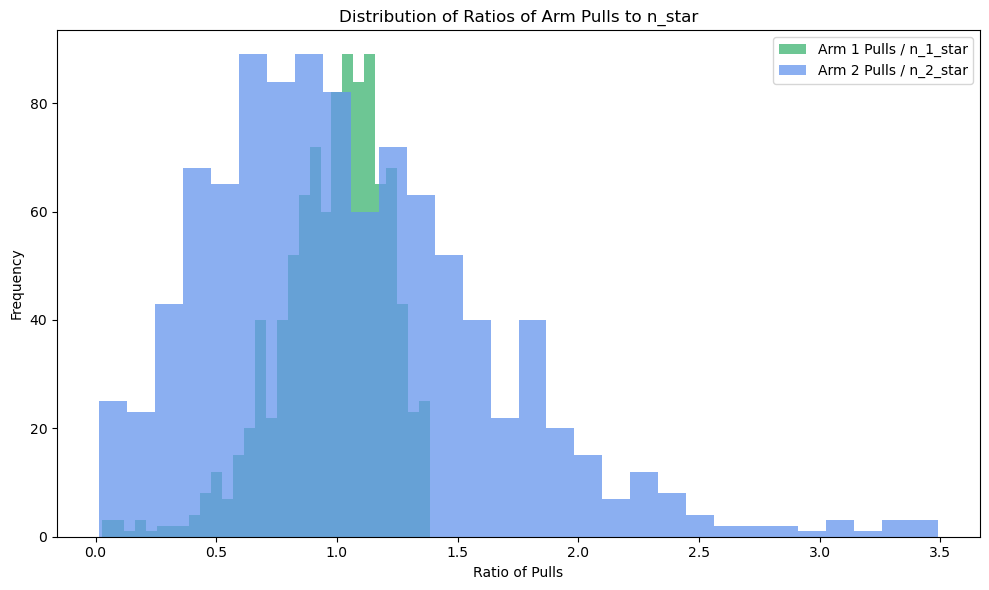

In [2]:
if __name__ == "__main__":
    # Inputs
    T = 1000
    num_experiments = 1000
    mu1 = 1.0
    theta = 1.0
    
    # Run experiments
    arm1_pulls, arm2_pulls, n_1_star, n_2_star = run_experiments(T, num_experiments, mu1, theta)
    
    # Plot results
    plot_results(arm1_pulls, arm2_pulls, n_1_star, n_2_star, filename = '2-arm-na-by-nastar-theta-1.pdf')


## Experiment 1 - $\theta$ = 0

Solution for n_star: 500.0


100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.44it/s]


Average Results after 1000 experiments:
Average Arm 1 pulls: 496.616
Average Arm 2 pulls: 503.384


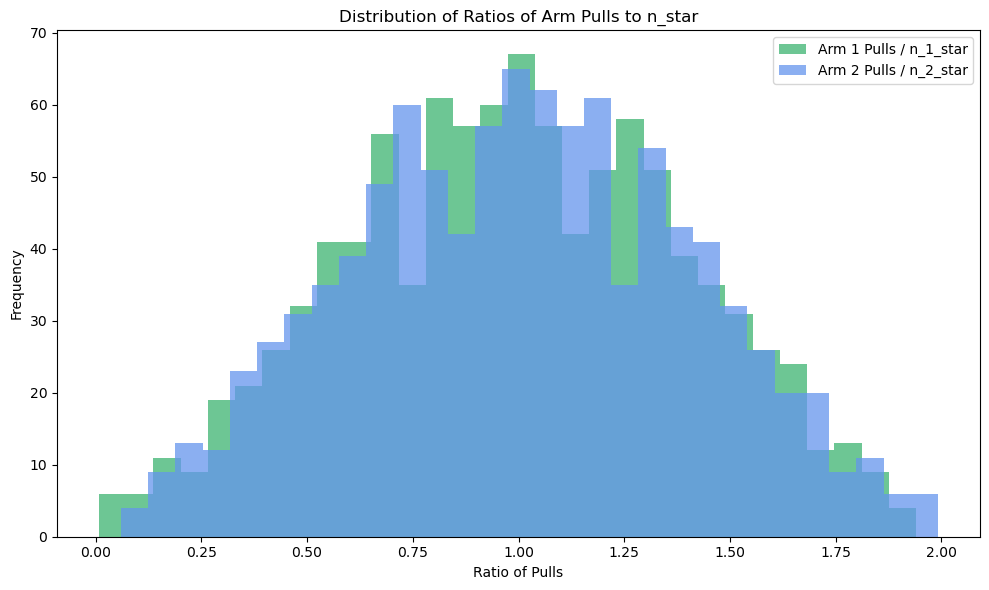

In [3]:
if __name__ == "__main__":
    # Inputs
    T = 1000
    num_experiments = 1000
    mu1 = 1.0
    theta = 0.0
    
    # Run experiments
    arm1_pulls, arm2_pulls, n_1_star, n_2_star = run_experiments(T, num_experiments, mu1, theta)
    
    # Plot results
    plot_results(arm1_pulls, arm2_pulls, n_1_star, n_2_star, filename = '2-arm-na-by-nastar-theta-0.pdf')


## Experiment 1 - $\theta$ = 5

Solution for n_star: 858.6992917247409


100%|███████████████████████████████████████| 1000/1000 [00:32<00:00, 31.11it/s]


Average Results after 1000 experiments:
Average Arm 1 pulls: 855.911
Average Arm 2 pulls: 144.089


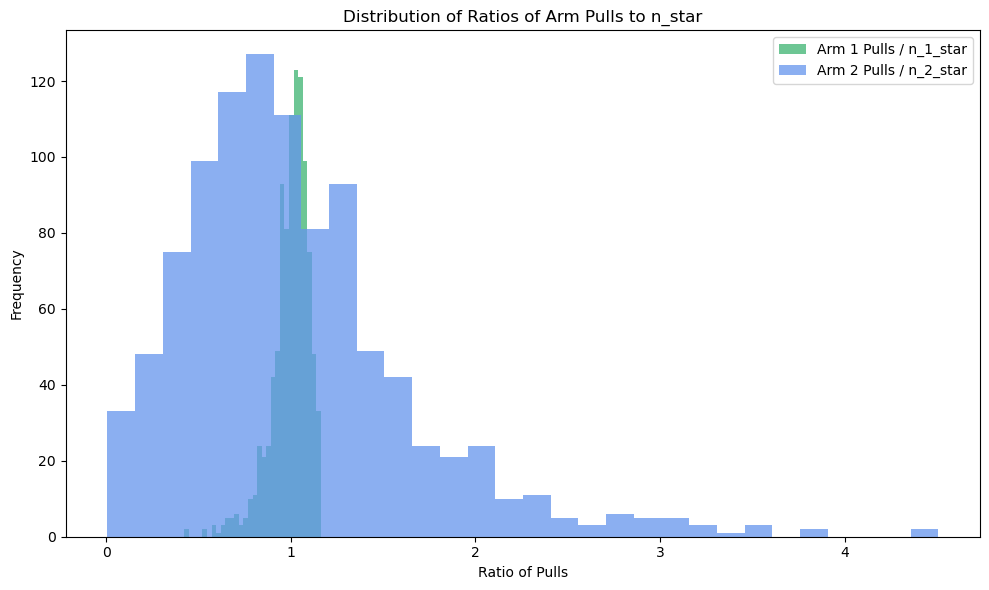

In [4]:
if __name__ == "__main__":
    # Inputs
    T = 1000
    num_experiments = 1000
    mu1 = 1.0
    theta = 5.0
    
    # Run experiments
    arm1_pulls, arm2_pulls, n_1_star, n_2_star = run_experiments(T, num_experiments, mu1, theta)
    
    # Plot results
    plot_results(arm1_pulls, arm2_pulls, n_1_star, n_2_star, filename = '2-arm-na-by-nastar-theta-5.pdf')
